In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
land_data = pd.read_csv('Dataset/archive/fao_data_land_data.csv')
land_data

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,11,Area,2007.0,1000 Ha,38661.0,Q,agricultural_area
1,Afghanistan,11,Area,2006.0,1000 Ha,38659.0,Fm,agricultural_area
2,Afghanistan,11,Area,2005.0,1000 Ha,38515.0,Fm,agricultural_area
3,Afghanistan,11,Area,2004.0,1000 Ha,38064.0,Fm,agricultural_area
4,Afghanistan,11,Area,2003.0,1000 Ha,38899.0,Fm,agricultural_area
...,...,...,...,...,...,...,...,...
104779,A,"May include official, semi-official or estimat...",NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation
104780,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation
104781,Q,Official data reported on FAO Questionnaires f...,NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation
104782,Fm,Manual Estimation,NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation


In [3]:
 print(land_data.category.unique())

['agricultural_area' 'agricultural_area_irrigated' 'arable_land'
 'arable_land_and_permanent_crops' 'country_area' 'fallow_land'
 'forest_area' 'inland_water' 'land_area' 'other_land'
 'perm_crops_irrigated' 'perm_crops_non_irrigated'
 'perm_meadows_pastures_cult_irrig' 'perm_meadows_pastures_cult_non_irrig'
 'perm_meadows_pastures_cultivated' 'perm_meadows_pastures_nat_grown'
 'permanent_crops' 'permanent_meadows_and_pastures' 'temp_crops_irrigated'
 'temp_crops_non_irrigated' 'temp_meadows_pastures_irrigated'
 'temp_meadows_pastures_non_irrig' 'temporary_crops'
 'temporary_meadows_and_pastures' 'total_area_equipped_for_irrigation']


In [4]:
#See what each category means for country India and year 2007, 1989
filtered_df = land_data[(land_data['country_or_area'] == 'India') & (land_data['year'].isin([2007,1989]))]
filtered_df

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
4467,India,11,Area,2007.0,1000 Ha,179900.0,Fm,agricultural_area
4485,India,11,Area,1989.0,1000 Ha,181284.0,Q,agricultural_area
15858,India,11,Area,2007.0,1000 Ha,158650.0,Fm,arable_land
15876,India,11,Area,1989.0,1000 Ha,162985.0,F,arable_land
26824,India,11,Area,2007.0,1000 Ha,169500.0,Fm,arable_land_and_permanent_crops
26842,India,11,Area,1989.0,1000 Ha,169485.0,Q,arable_land_and_permanent_crops
38053,India,11,Area,2007.0,1000 Ha,328726.0,W,country_area
38071,India,11,Area,1989.0,1000 Ha,328726.0,Q,country_area
47166,India,11,Area,2007.0,1000 Ha,67759.8,Fm,forest_area
53153,India,11,Area,2007.0,1000 Ha,31407.0,Fm,inland_water


Observations:
1. The country_area and land_area remained constant over the years. So, we can ignore those categories.
2. Domain questions: 
    Arable land: land under temporary crops. 
    Is arable_land_and_permanent_crops a subset of agricultural_area? Since,Area(arable_land_and_permanent_crops)< Area(agricultural_area).
3. Therefore, I am assuming agricultural_area is the total land available for agriculture for each country.


In [5]:
agri_land_data = land_data.drop(land_data[land_data['category'] != 'agricultural_area'].index)
agri_land_data

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,11,Area,2007.0,1000 Ha,38661.0,Q,agricultural_area
1,Afghanistan,11,Area,2006.0,1000 Ha,38659.0,Fm,agricultural_area
2,Afghanistan,11,Area,2005.0,1000 Ha,38515.0,Fm,agricultural_area
3,Afghanistan,11,Area,2004.0,1000 Ha,38064.0,Fm,agricultural_area
4,Afghanistan,11,Area,2003.0,1000 Ha,38899.0,Fm,agricultural_area
...,...,...,...,...,...,...,...,...
11157,A,"May include official, semi-official or estimat...",NaN,NaN,NaN,NaN,NaN,agricultural_area
11158,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,agricultural_area
11159,Q,Official data reported on FAO Questionnaires f...,NaN,NaN,NaN,NaN,NaN,agricultural_area
11160,Fm,Manual Estimation,NaN,NaN,NaN,NaN,NaN,agricultural_area


In [6]:
missing_cols = agri_land_data.columns[agri_land_data.isnull().any()]
print(missing_cols)

Index(['element', 'year', 'unit', 'value', 'value_footnotes'], dtype='object')


In [7]:
agri_land_data.dropna(inplace=True)
agri_land_data

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,11,Area,2007.0,1000 Ha,38661.0,Q,agricultural_area
1,Afghanistan,11,Area,2006.0,1000 Ha,38659.0,Fm,agricultural_area
2,Afghanistan,11,Area,2005.0,1000 Ha,38515.0,Fm,agricultural_area
3,Afghanistan,11,Area,2004.0,1000 Ha,38064.0,Fm,agricultural_area
4,Afghanistan,11,Area,2003.0,1000 Ha,38899.0,Fm,agricultural_area
...,...,...,...,...,...,...,...,...
11149,Zimbabwe,11,Area,1965.0,1000 Ha,11305.0,Fm,agricultural_area
11150,Zimbabwe,11,Area,1964.0,1000 Ha,11240.0,Fm,agricultural_area
11151,Zimbabwe,11,Area,1963.0,1000 Ha,11155.0,Fm,agricultural_area
11152,Zimbabwe,11,Area,1962.0,1000 Ha,11070.0,Fm,agricultural_area


In [8]:
 print(agri_land_data.element.unique())

['Area']


In [9]:
print(agri_land_data.unit.unique())

['1000 Ha']


In [10]:
agri_land_data = agri_land_data[['country_or_area', 'year', 'value']]
agri_land_data.columns = ['Country', 'Year', 'Area']
agri_land_data.head()

,Country,Year,Area
0,Afghanistan,2007.0,38661.0
1,Afghanistan,2006.0,38659.0
2,Afghanistan,2005.0,38515.0
3,Afghanistan,2004.0,38064.0
4,Afghanistan,2003.0,38899.0


In [11]:
agri_land_data.sort_values('Area', ascending=False)

,Country,Year,Area
10941,World +,2001.0,4967137.1
10942,World +,2000.0,4960102.2
10943,World +,1999.0,4952892.1
10940,World +,2002.0,4950709.3
10937,World +,2005.0,4945770.4
...,...,...,...
8822,Singapore,2004.0,0.8
8821,Singapore,2005.0,0.8
8820,Singapore,2006.0,0.8
8819,Singapore,2007.0,0.8


In [12]:
agri_land_data = agri_land_data[~agri_land_data['Country'].str.endswith('+')]
agri_land_data

,Country,Year,Area
0,Afghanistan,2007.0,38661.0
1,Afghanistan,2006.0,38659.0
2,Afghanistan,2005.0,38515.0
3,Afghanistan,2004.0,38064.0
4,Afghanistan,2003.0,38899.0
...,...,...,...
11149,Zimbabwe,1965.0,11305.0
11150,Zimbabwe,1964.0,11240.0
11151,Zimbabwe,1963.0,11155.0
11152,Zimbabwe,1962.0,11070.0


In [13]:
# pivot_df = agri_land_data.pivot(index='Country', columns='Year', values='Area')
# pivot_df.head(10)

In [14]:
top_10_countries = agri_land_data.groupby('Year').apply(lambda x: x.nlargest(10, 'Area')).reset_index(drop=True)
#x is the grouped df. The result contains the top 10 countries areawise 
top_10_countries

,Country,Year,Area
0,USSR,1961.0,541800.0
1,Australia,1961.0,461585.0
2,United States of America,1961.0,447509.0
3,China,1961.0,343248.0
4,India,1961.0,174907.0
...,...,...,...
465,Kazakhstan,2007.0,207898.0
466,India,2007.0,179900.0
467,Saudi Arabia,2007.0,173625.0
468,Sudan,2007.0,136773.0


C:\Users\saumy\AppData\Local\Temp\ipykernel_17992\4028507364.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(group['Country'], rotation=5)  # Rotate x-axis labels
C:\Users\saumy\AppData\Local\Temp\ipykernel_17992\4028507364.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(group['Country'], rotation=5)  # Rotate x-axis labels
C:\Users\saumy\AppData\Local\Temp\ipykernel_17992\4028507364.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(group['Country'], rotation=5)  # Rotate x-axis labels
C:\Users\saumy\AppData\Local\Temp\ipykernel_17992\4028507364.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(group['Country'], rotation=5)  # Rotate x-axis labels
C:\Users\saumy\AppData\Local\Temp\ipykernel_17992\4028507364.py:11: UserWarning: FixedFormatter should only be used together wit

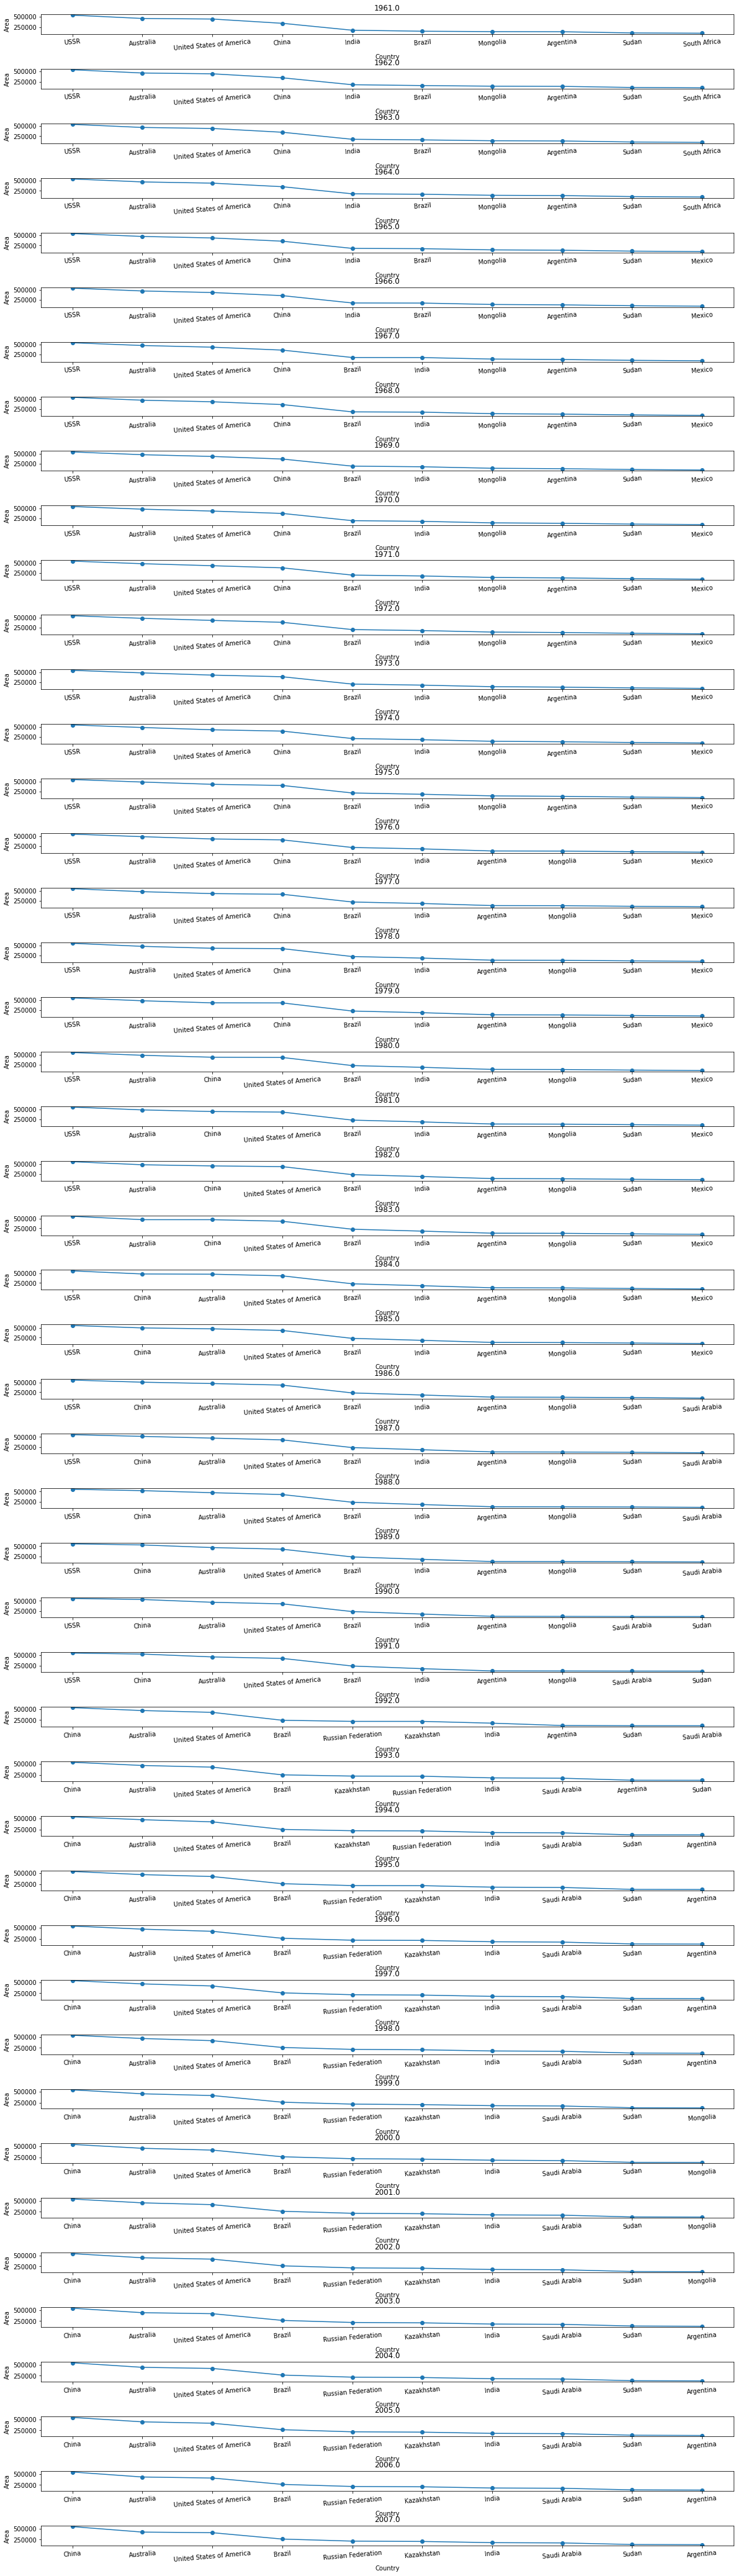

In [15]:
# Create subplots for each year
fig, axes = plt.subplots(nrows=len(top_10_countries['Year'].unique()), figsize=(20, 75), gridspec_kw={'hspace': 1.75})

# Iterate over each year and plot the data
for i, (year, group) in enumerate(top_10_countries.groupby('Year')):
    ax = axes[i]  # Select the appropriate subplot
    ax.plot(group['Country'], group['Area'], marker='o')
    ax.set_title(year)  # Set the subplot title
    ax.set_xlabel('Country')
    ax.set_ylabel('Area')
    ax.set_xticklabels(group['Country'], rotation=5)  # Rotate x-axis labels

plt.tight_layout()

# Display the plot
plt.show()


Top agricultural nations in 2007:
China
USA
India
USSR
Brazil
France
Germany
Italy
Argentina
Indonesia

Australia, Russian Federation, Kazakhstan, Saudi Arabia, Sudan have agricultural land. Still they don't contribute a significant portion of world's produce.

I want to combine the production indices dataset and land_data dataset to calculate the gross production per Ha for these countries. 


In [16]:
# agri_land_data 
#Taken from previous notebook
df2 = pd.read_csv('Dataset/archive/fao_data_production_indices_data.csv')
df2 = df2[df2['category']=='agriculture_pin']
df2.dropna(inplace=True)


In [17]:
prod_data = df2.drop(df2[df2['element'] != 'Gross Production 1999-2001 (1000 I$)'].index) #Assigning to new df drops the rest of the rows


In [18]:
filtr_data = prod_data[['country_or_area', 'year', 'value']]
filtr_data.columns = ['Country', 'Year', 'Gross_Production']
gross_prod_data = filtr_data[~filtr_data['Country'].str.endswith('+')]
gross_prod_data

,Country,Year,Gross_Production
0,Afghanistan,2007.0,2486910.0
1,Afghanistan,2006.0,2278516.0
2,Afghanistan,2005.0,2524097.0
3,Afghanistan,2004.0,2226346.0
4,Afghanistan,2003.0,2289434.0
...,...,...,...
63856,Zimbabwe,1965.0,687546.0
63857,Zimbabwe,1964.0,740738.0
63858,Zimbabwe,1963.0,625430.0
63859,Zimbabwe,1962.0,679806.0


In [19]:
#Setting multi-level index
agri_land_data.set_index(['Country', 'Year'], inplace=True)
gross_prod_data.set_index(['Country', 'Year'], inplace=True)

In [20]:
combined_df = pd.concat([gross_prod_data, agri_land_data], axis=1)
combined_df

Gross_Production     Area
Country                  Year                             
Afghanistan              2007.0         2486910.0  38661.0
                         2006.0         2278516.0  38659.0
                         2005.0         2524097.0  38515.0
                         2004.0         2226346.0  38064.0
                         2003.0         2289434.0  38899.0
...                                           ...      ...
Turks and Caicos Islands 1965.0               NaN      1.0
                         1964.0               NaN      1.0
                         1963.0               NaN      1.0
                         1962.0               NaN      1.0
                         1961.0               NaN      1.0

[9724 rows x 2 columns]

9587 rows × 3 columns --> agri_land_data
9275 rows × 3 columns --> gross_prod_data
9724 rows × 2 columns --> combined_df

In [21]:
combined_df.dropna(inplace=True) #9138 rows × 2 columns
combined_df['Efficiency'] = combined_df['Gross_Production']/combined_df['Area'] #Don't know the technical term for efficiency. Unit is $/Ha
combined_df

Gross_Production     Area  Efficiency
Country     Year                                         
Afghanistan 2007.0         2486910.0  38661.0   64.326065
            2006.0         2278516.0  38659.0   58.938824
            2005.0         2524097.0  38515.0   65.535428
            2004.0         2226346.0  38064.0   58.489544
            2003.0         2289434.0  38899.0   58.855857
...                              ...      ...         ...
Zimbabwe    1965.0          687546.0  11305.0   60.817868
            1964.0          740738.0  11240.0   65.901957
            1963.0          625430.0  11155.0   56.067234
            1962.0          679806.0  11070.0   61.409756
            1961.0          640644.0  10985.0   58.319891

[9138 rows x 3 columns]

In [29]:
combined_df.sort_values(['Efficiency'], ascending=False, axis=0, inplace=True)
combined_df

Gross_Production  Area    Efficiency
Country                   Year                                        
Singapore                 1991.0           86499.0   1.2  72082.500000
                          1992.0           71552.0   1.2  59626.666667
                          1989.0          105656.0   2.0  52828.000000
                          1990.0          102965.0   2.0  51482.500000
                          1987.0          141560.0   3.0  47186.666667
...                                            ...   ...           ...
Saint Pierre and Miquelon 1962.0               0.0   3.0      0.000000
Cayman Islands            1961.0               0.0   3.0      0.000000
Saint Pierre and Miquelon 1964.0               0.0   3.0      0.000000
                          1961.0               0.0   3.0      0.000000
                          1965.0               0.0   3.0      0.000000

[9138 rows x 3 columns]

In [23]:
combined_df.loc[['United States of America']]

Gross_Production      Area  Efficiency
Country                  Year                                          
United States of America 2007.0       184698800.0  411158.0  449.216116
                         2004.0       183519100.0  414674.0  442.562350
                         2005.0       181432900.0  412878.0  439.434651
                         2006.0       176803000.0  411060.0  430.114825
                         2000.0       173640200.0  414399.0  419.016938
                         2003.0       172458200.0  416902.0  413.666041
                         2001.0       170755800.0  414944.0  411.515289
                         1999.0       170083400.0  413887.0  410.941634
                         1998.0       167311700.0  414588.0  403.561367
                         1997.0       167072000.0  414885.0  402.694723
                         2002.0       167494400.0  416067.0  402.565933
                         1994.0       164433800.0  421139.0  390.450184
                         1996.0       162066800.0  416306.0  389.297296
                         1992.0       155467400.0  425429.0  365.436771
                         1995.0       152325500.0  420139.0  362.559772
                         1990.0       144644000.0  426948.0  338.785988
                         1993.0       142796300.0  422948.0  337.621410
                         1991.0       143249500.0  426948.0  335.519782
                         1985.0       143144600.0  431399.0  331.814863
                         1981.0       139390800.0  428163.0  325.555454
                         1989.0       138218400.0  426948.0  323.735912
                         1982.0       139500900.0  431399.0  323.368622
                         1987.0       136752700.0  426948.0  320.302941
                         1986.0       136708300.0  431399.0  316.895264
                         1984.0       136529200.0  431399.0  316.480103
                         1979.0       133091500.0  428163.0  310.843067
                         1988.0       126910100.0  426948.0  297.249548
                         1980.0       127118400.0  428163.0  296.892539
                         1978.0       126211800.0  428163.0  294.775121
                         1977.0       126192700.0  430331.0  293.245664
                         1976.0       120877500.0  430158.0  281.007211
                         1983.0       119197600.0  431399.0  276.304767
                         1975.0       117511000.0  430158.0  273.181017
                         1973.0       113008600.0  431200.0  262.079314
                         1972.0       111439800.0  432300.0  257.783484
                         1971.0       111234700.0  433300.0  256.715209
                         1974.0       110119400.0  430158.0  255.997564
                         1969.0       104285200.0  435447.0  239.489995
                         1968.0       103420600.0  435795.0  237.314793
                         1970.0       102786400.0  434400.0  236.616943
                         1967.0       101177900.0  435307.0  232.428838
                         1965.0        97704050.0  435873.0  224.157151
                         1966.0        97277180.0  435550.0  223.343313
                         1964.0        94323650.0  439012.0  214.854378
                         1963.0        93700380.0  441443.0  212.259295
                         1962.0        90275010.0  443991.0  203.326216
                         1961.0        89816580.0  447509.0  200.703405

In [24]:
combined_df.loc[['France']]

Gross_Production     Area   Efficiency
Country Year                                          
France  2002.0        37868760.0  29555.0  1281.297919
        1999.0        38125640.0  29900.0  1275.105017
        2004.0        37570700.0  29611.0  1268.808889
        1998.0        37902710.0  29927.0  1266.505497
        2000.0        37449710.0  29706.0  1260.678314
        1997.0        37540180.0  29960.0  1253.010013
        1996.0        37320910.0  29998.0  1244.113274
        2005.0        36169630.0  29550.0  1224.014552
        2001.0        35782140.0  29631.0  1207.591374
        1992.0        36502890.0  30331.0  1203.484554
        2006.0        34776620.0  29503.0  1178.748602
        1995.0        35418700.0  30059.0  1178.305998
        2003.0        34763540.0  29688.0  1170.962679
        2007.0        34377050.0  29418.0  1168.571963
        1990.0        35135860.0  30570.0  1149.357540
        1994.0        34601140.0  30119.0  1148.814370
        1991.0        34853330.0  30426.0  1145.511405
        1993.0        34503340.0  30203.0  1142.381220
        1987.0        35539910.0  31353.0  1133.540969
        1988.0        34906030.0  30830.0  1132.209861
        1989.0        34703740.0  30670.0  1131.520704
        1984.0        35548380.0  31508.0  1128.233465
        1985.0        34943830.0  31442.0  1111.374276
        1986.0        34515950.0  31395.0  1099.409142
        1982.0        34577530.0  31646.0  1092.635088
        1983.0        33070830.0  31565.0  1047.705687
        1980.0        33203840.0  31722.0  1046.713322
        1979.0        32990410.0  31834.0  1036.326255
        1981.0        32392090.0  31687.0  1022.251712
        1978.0        30657640.0  31961.0   959.220300
        1973.0        30877850.0  32460.0   951.258472
        1974.0        30775730.0  32442.0   948.638493
        1976.0        29122940.0  32021.0   909.495019
        1975.0        29088000.0  32357.0   898.970856
        1977.0        28473830.0  31910.0   892.316829
        1970.0        28293850.0  32495.0   870.713956
        1971.0        28380690.0  32623.0   869.959538
        1972.0        28244560.0  32515.0   868.662463
        1968.0        28165500.0  33178.0   848.920972
        1967.0        27156150.0  33629.0   807.521782
        1969.0        26664590.0  33173.0   803.803997
        1965.0        26780910.0  34001.0   787.650657
        1962.0        26654000.0  34440.0   773.925668
        1966.0        25447410.0  33846.0   751.858713
        1964.0        25321080.0  34109.0   742.357735
        1963.0        25202710.0  34354.0   733.617919
        1961.0        23408500.0  34539.0   677.741104

In [25]:
combined_df.loc[['Mexico']]

Gross_Production      Area  Efficiency
Country Year                                          
Mexico  2007.0        27352720.0  106800.0  256.111610
        2006.0        26920430.0  106800.0  252.063951
        2004.0        25664420.0  107400.0  238.961080
        2005.0        25389600.0  107300.0  236.622554
        2003.0        24871430.0  107400.0  231.577561
        2001.0        24163380.0  107400.0  224.984916
        2002.0        23971430.0  107400.0  223.197672
        2000.0        22894310.0  107300.0  213.367288
        1999.0        22569680.0  107300.0  210.341845
        1998.0        21856590.0  107300.0  203.696086
        1997.0        20832860.0  107200.0  194.336381
        1996.0        20408980.0  107200.0  190.382276
        1995.0        20329250.0  107200.0  189.638526
        1994.0        19180150.0  106600.0  179.926360
        1993.0        18676690.0  105900.0  176.361568
        1992.0        17976760.0  105200.0  170.881749
        1987.0        17348270.0  101700.0  170.582793
        1991.0        17825260.0  104500.0  170.576651
        1986.0        17114680.0  101000.0  169.452277
        1990.0        17548020.0  103800.0  169.056069
        1985.0        16687200.0  100200.0  166.538922
        1988.0        16898020.0  102400.0  165.019727
        1984.0        15988200.0   99437.0  160.787232
        1983.0        15893430.0   99437.0  159.834166
        1981.0        15551310.0   99249.0  156.689841
        1989.0        16143390.0  103100.0  156.579922
        1982.0        15203850.0   99387.0  152.976244
        1980.0        14636060.0   99199.0  147.542415
        1978.0        13942730.0   98839.0  141.065065
        1979.0        13496350.0   98969.0  136.369469
        1977.0        12952340.0   98699.0  131.230712
        1976.0        11692620.0   98529.0  118.671863
        1975.0        11555780.0   98339.0  117.509635
        1974.0        11417320.0   98199.0  116.267172
        1973.0        11049430.0   98079.0  112.658469
        1972.0        10694120.0   97919.0  109.213942
        1971.0        10158240.0   97779.0  103.889792
        1970.0         9773528.0   97637.0  100.100659
        1968.0         9645997.0   97769.0   98.661099
        1969.0         9460885.0   97709.0   96.827160
        1967.0         9259961.0   97839.0   94.644886
        1966.0         9141114.0   97914.0   93.358600
        1965.0         8604104.0   97979.0   87.815797
        1964.0         8044878.0   98049.0   82.049567
        1963.0         7394225.0   98109.0   75.367448
        1962.0         7098856.0   98179.0   72.305238
        1961.0         6632554.0   98244.0   67.511034

In [26]:
combined_df.loc[['India']]

Gross_Production      Area  Efficiency
Country Year                                          
India   2007.0       175747700.0  179900.0  976.918844
        2006.0       164974800.0  179900.0  917.036131
        2005.0       156869200.0  179858.0  872.183612
        2003.0       151552000.0  180309.0  840.512675
        2004.0       149552600.0  180083.0  830.464841
        2001.0       147351100.0  180370.0  816.937961
        1999.0       143567200.0  180950.0  793.408124
        2000.0       142989200.0  182573.0  783.189190
        2002.0       137112300.0  180037.0  761.578453
        1998.0       137406600.0  181048.0  758.951217
        1997.0       134052000.0  180856.0  741.208475
        1996.0       132327200.0  180881.0  731.570480
        1995.0       126802000.0  180780.0  701.416086
        1994.0       123259200.0  181030.0  680.877203
        1993.0       119014000.0  181038.0  657.397894
        1992.0       115959300.0  180940.0  640.871560
        1991.0       110870700.0  181140.0  612.071878
        1990.0       109854700.0  181040.0  606.797945
        1989.0       109289000.0  181284.0  602.860705
        1988.0       102021900.0  181160.0  563.159086
        1985.0        93183620.0  180949.0  514.971732
        1986.0        93067530.0  181227.0  513.541194
        1987.0        92052060.0  181650.0  506.755078
        1984.0        90441380.0  181080.0  499.455379
        1983.0        88341420.0  180479.0  489.483098
        1981.0        79854310.0  180459.0  442.506664
        1982.0        79127070.0  180725.0  437.831346
        1978.0        75273500.0  180998.0  415.880286
        1980.0        74076420.0  180355.0  410.725624
        1977.0        72476440.0  180789.0  400.889656
        1979.0        71872960.0  180557.0  398.062440
        1975.0        67573710.0  180858.0  373.628537
        1976.0        66914630.0  180810.0  370.082573
        1973.0        63310020.0  179240.0  353.213680
        1971.0        61559940.0  177700.0  346.426224
        1974.0        61161410.0  180010.0  339.766735
        1970.0        60053830.0  178050.0  337.286324
        1972.0        58725260.0  178220.0  329.509932
        1969.0        56970870.0  177890.0  320.258980
        1968.0        55208160.0  178370.0  309.514829
        1967.0        52731470.0  177820.0  296.544090
        1964.0        52267720.0  176719.0  295.767405
        1963.0        51367730.0  176180.0  291.563912
        1961.0        50142680.0  174907.0  286.681951
        1962.0        50015760.0  176402.0  283.532840
        1965.0        49498330.0  177243.0  279.268180
        1966.0        49309560.0  177630.0  277.597028